In [841]:
# Colab 폴더로 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning

/content/drive/MyDrive/Colab Notebooks/DeepLearning


# 당뇨데이터 딥러닝 모델 구축

In [842]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


[1] 데이터 탐색 

In [843]:
df_origin = pd.read_csv('diabetes.csv')
df = df_origin.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [844]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [845]:
target = df['Outcome']
data = df.drop(['Outcome'],axis = 1)

In [846]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


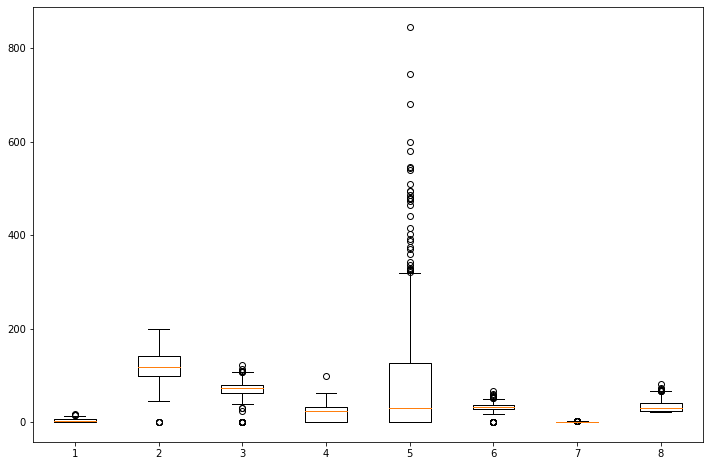

In [847]:
plt.figure(figsize=(12,8))
plt.boxplot([data['Pregnancies'],data['Glucose'],data['BloodPressure'],data['SkinThickness'],data['Insulin'],data['BMI'],data['DiabetesPedigreeFunction'],data['Age']])
plt.show()

In [848]:
data['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [849]:
# data = data.replace(0,np.nan)
# data = data.dropna()
# data = data.reset_index()


In [850]:
df.corrwith(df['Outcome'])

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
dtype: float64

정규화

In [851]:
scaler_standard=StandardScaler()
data = scaler_standard.fit_transform(data)


표준화

In [852]:
# scaler_minmax=MinMaxScaler()
# data = scaler_minmax.fit_transform(data)

In [853]:
x_train, x_val, y_train, y_val = train_test_split(data,target,test_size=0.2, stratify=target, random_state =42)
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.2, stratify=y_train, random_state =42)

[2] 모델 생성


In [854]:
model = Sequential()

In [855]:
model.add(Flatten(input_shape = (8,)))

In [856]:
model.add(Dense(10,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(100,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [857]:
model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_37 (Flatten)        (None, 8)                 0         
                                                                 
 dense_127 (Dense)           (None, 10)                90        
                                                                 
 dropout_45 (Dropout)        (None, 10)                0         
                                                                 
 dense_128 (Dense)           (None, 100)               1100      
                                                                 
 dropout_46 (Dropout)        (None, 100)               0         
                                                                 
 dense_129 (Dense)           (None, 100)               10100     
                                                                 
 dense_130 (Dense)           (None, 1)               

In [858]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics = 'accuracy')

In [859]:
x_train.shape, y_train.shape, x_val.shape , y_val.shape

((491, 8), (491,), (154, 8), (154,))

In [860]:
# 모델 훈련
his = model.fit(x_train,y_train, 
                epochs=100,
                validation_data = (x_val,y_val)
                )

Epoch 1/100
16/16 [==============================] - 1s 12ms/step - loss: 0.6653 - accuracy: 0.6232 - val_loss: 0.6473 - val_accuracy: 0.6494
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6403 - accuracy: 0.6517 - val_loss: 0.6297 - val_accuracy: 0.6494
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6051 - accuracy: 0.6640 - val_loss: 0.6176 - val_accuracy: 0.6558
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6023 - accuracy: 0.6741 - val_loss: 0.6021 - val_accuracy: 0.6623
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5864 - accuracy: 0.6904 - val_loss: 0.5882 - val_accuracy: 0.6818
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.7128 - val_loss: 0.5767 - val_accuracy: 0.6948
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5501 - accuracy: 0.7088 - val_loss: 0.5663 - val_accuracy: 0.6883
Epoch 8/100


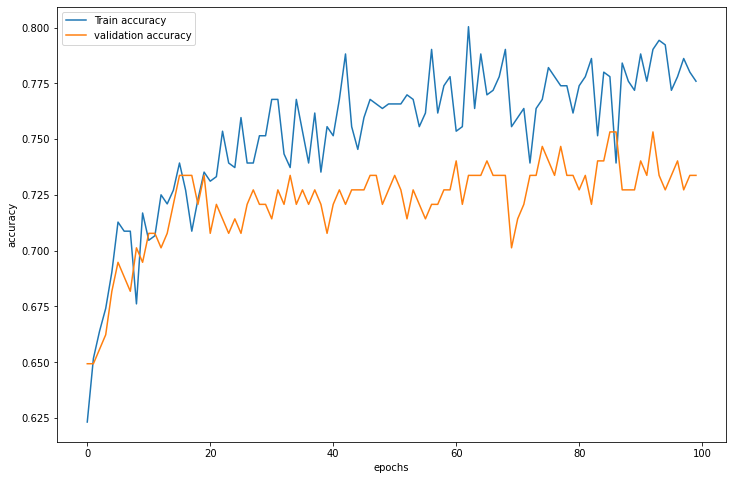

In [861]:
# 학습 진행 결과 시각화
plt.figure(figsize=(12,8))
plt.plot(his.epoch, his.history['accuracy'],label='Train accuracy')
plt.plot(his.epoch, his.history['val_accuracy'],label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

[3] 평가

In [862]:
test_result = model.evaluate(x_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.4616 - accuracy: 0.7805
